In [16]:
import numpy as np
import pandas as pd

#Installed
!pip install pandas_datareader

In [17]:
from pandas_datareader import data as wb

In [18]:
ticker = ['PG','^GSPC']
data = pd.DataFrame()
for t in ticker:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1',end='2016-12-31')['Adj Close']

In [19]:
sec_returns = np.log(data/data.shift(1))

In [20]:
cov = sec_returns.cov() * 250

In [21]:
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [22]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.010078082807976336

In [23]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.016361631002308474

In [24]:
PG_beta = cov_with_market / market_var
PG_beta

0.6159583238709155

## CALCULATED EXPECTED RETURN OF STOCK 

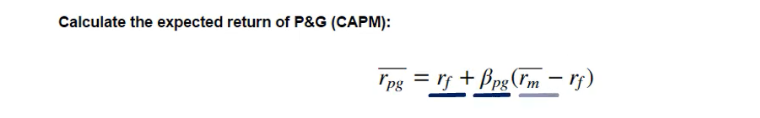

In [25]:
PG_er = 0.025 + PG_beta * 0.05

In [26]:
PG_erta

0.05579791619354578

## CALCULATE SHARP RATIO 
helpful for stock portfolio comparison

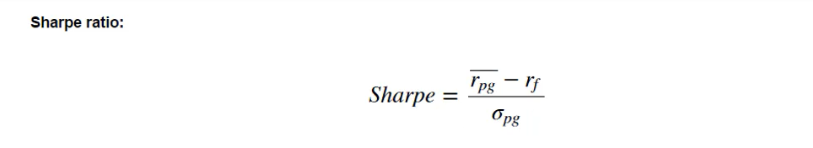

In [27]:
Sharpe = (PG_er - 0.025) / (sec_returns['PG'].std() * 250 ** 0.5)
Sharpe

0.21558011156834478